In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head(5)
df["Gender"] = df["Gender"].fillna(df["Gender"].mode())

# UNIVARIATE ANALYSIS

In [4]:
univariate = df[["Geography","Gender","Exited"]]

In [5]:
univariate.head(5)

,Geography,Gender,Exited
0,France,Male,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [6]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode())
univariate.head(5)

,Geography,Gender,Exited
0,France,Male,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [7]:
univariate.isnull().sum()

Geography     0
Gender       20
Exited        0
dtype: int64

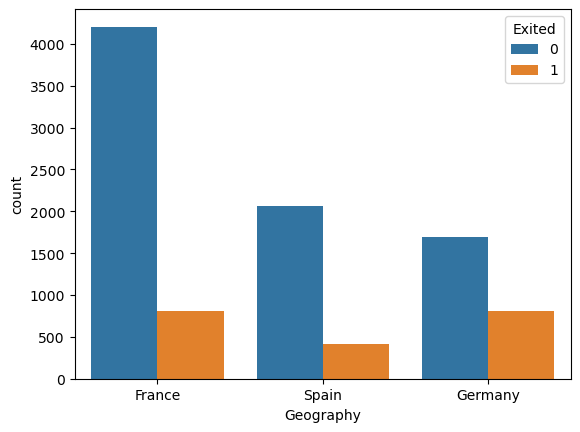

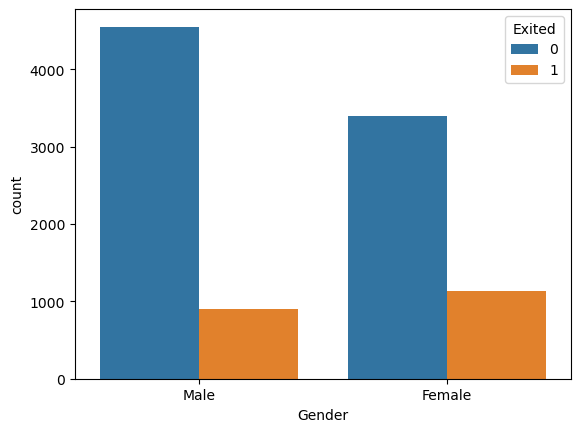

In [11]:
for i,predictor in enumerate(univariate.drop(columns=["Exited"])):
    plt.figure()
    sns.countplot(data=univariate, x=predictor, hue='Exited')

# BIVARIATE ANALYSIS

<Axes: xlabel='Gender', ylabel='Count'>

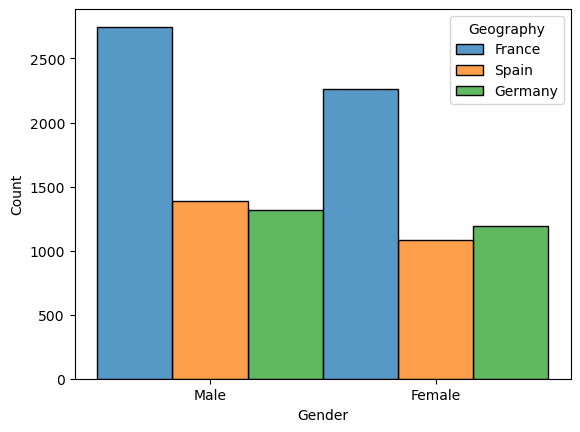

In [14]:
sns.histplot(data=univariate, x = "Gender", hue = "Geography", stat = "count", multiple = "dodge")

In [16]:
df_new = univariate.loc[univariate["Exited"]==1]

<Axes: xlabel='Gender', ylabel='Count'>

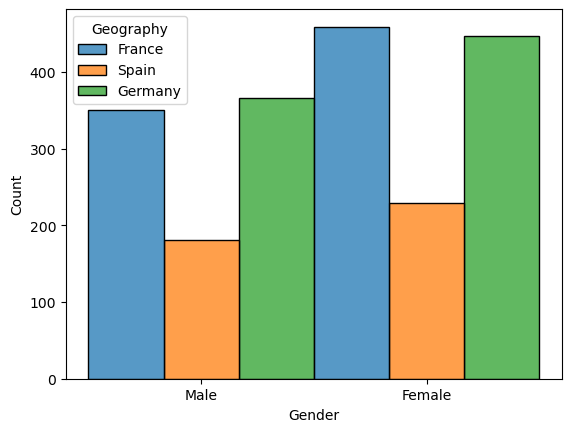

In [17]:
sns.histplot(data=df_new, x = "Gender", hue = "Geography", stat = "count", multiple = "dodge")

# Numerical Analysis

In [20]:
df.corr(numeric_only=True)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000285,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009630,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.004844,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000285,0.009630,-0.004844,1.000000,-0.010264,0.028247,-0.030250,-0.011897,0.085036,-0.006948,0.285532
Tenure,-0.006495,-0.014883,0.000842,-0.010264,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028247,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030250,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011897,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085036,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.006948,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

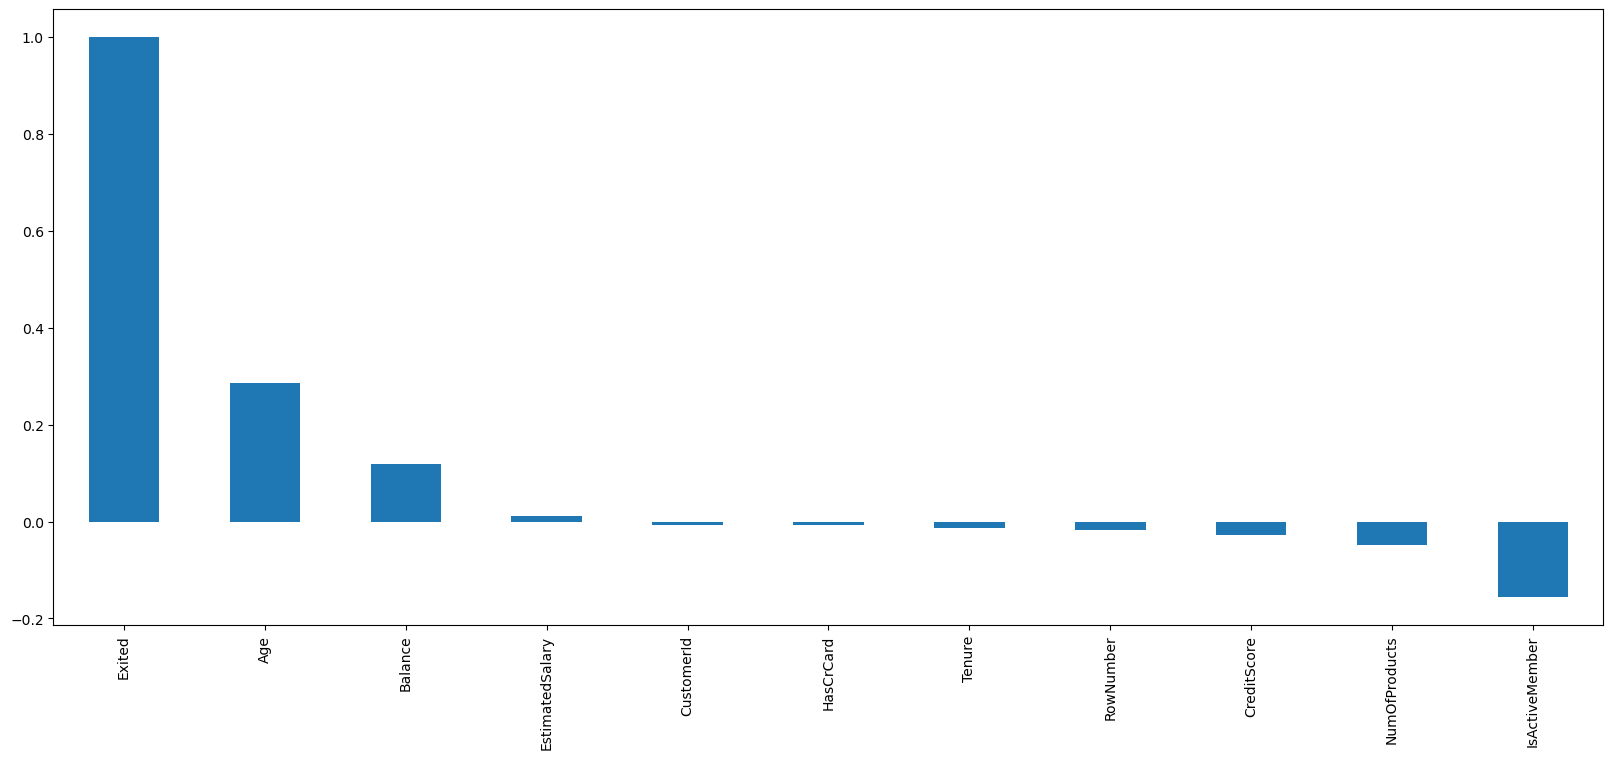

In [24]:
plt.figure(figsize=(20,8))
df.corr(numeric_only=True)['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

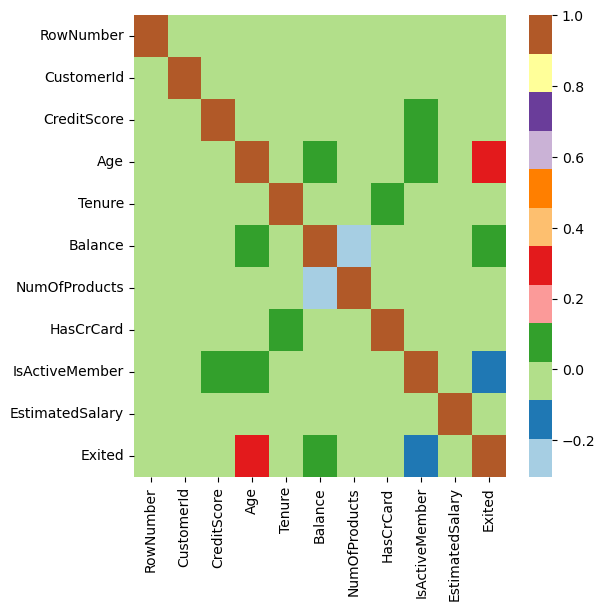

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True),cmap="Paired")

In [26]:
df['Age'].value_counts()

Age
37.0    478
38.0    477
35.0    474
36.0    456
34.0    447
       ... 
84.0      2
82.0      1
88.0      1
85.0      1
83.0      1
Name: count, Length: 70, dtype: int64

<Axes: xlabel='Age'>

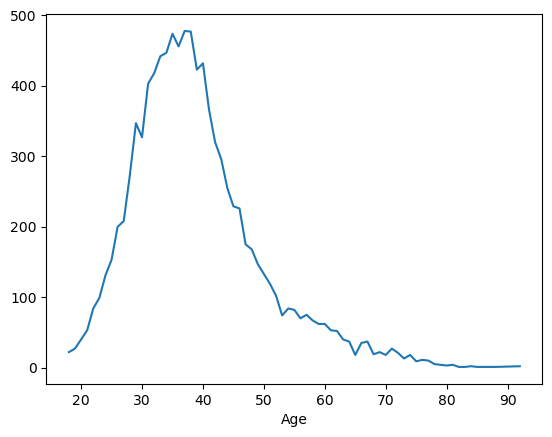

In [28]:
df['Age'].value_counts().sort_index(ascending=True).plot()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10048\2343833668.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df['Age'][(df['Exited']==0)],color='red',shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10048\2343833668.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df['Age'][(df['Exited']==1)],color='blue',shade=True)


Text(0.5, 1.0, 'Age by churn')

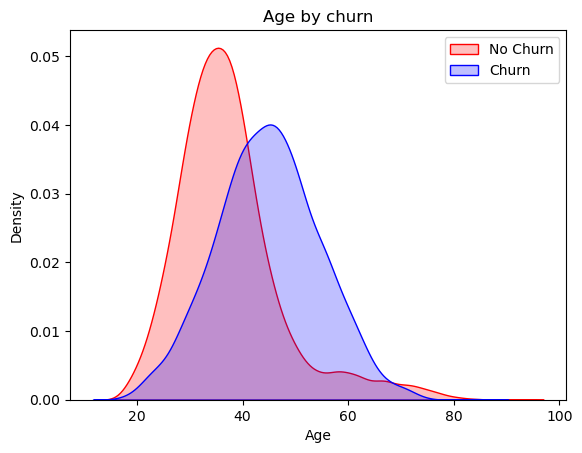

In [29]:
Tot = sns.kdeplot(df['Age'][(df['Exited']==0)],color='red',shade=True)
Tot = sns.kdeplot(df['Age'][(df['Exited']==1)],color='blue',shade=True)
Tot.legend(["No Churn","Churn"],loc="upper right")
Tot.set_ylabel("Density")
Tot.set_xlabel("Age")
Tot.set_title("Age by churn")